In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Завантажити дані

In [2]:
train_targets = pd.read_csv("train_targets.csv", index_col = "match_id_hash")
y = train_targets["radiant_win"].astype('int')
y.head()

match_id_hash
a400b8f29dece5f4d266f49f1ae2e98a    0
b9c57c450ce74a2af79c9ce96fac144d    1
6db558535151ea18ca70a6892197db41    1
46a0ddce8f7ed2a8d9bd5edcbb925682    1
b1b35ff97723d9b7ade1c9c3cf48f770    0
Name: radiant_win, dtype: int64

In [3]:
train_features = pd.read_csv("train_features.csv", index_col = "match_id_hash")
test_features = pd.read_csv("test_features.csv", index_col= "match_id_hash")
train_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


Вивести форму X , y (кількість рядків, стовпчиків) 

In [4]:
train_features.shape, y.shape

((39675, 245), (39675,))

# Підготуємо описання задачі

Задача - визначити команду, яка виграє у матчі Dota 2 (Radiant або Dire) за характеристиками матчу. Фактично, це бінарна класифікація, цільовою змінною якої є "radiant_win" (True, False) <br>

# Опис колонок, що описують стан гри:

game_time - момент, в який взято стан гри <br>
game_mode - режим гри (категорія) <br>
lobby_type - ??? <br>
objectives_len - ??? <br>
chat_len - ??? (довжина чату, мабуть) <br>

Команди Radiant і Dire складаються із пяти гравців. Стан гравців описують такі предиктори:

r{i}_hero_id, d{i}_hero_id - ідентифікатор героя, якого обрав гравець (категорія) <br>
r{i}_lh, d{i}_lh - number of enemy team creeps killed <br>
r{i}_denies, d{i}_denies - number of same-team creeps killed to deny enemy gold <br>
... <br>
r{i}_x, r{i}_y, d{i}_x, d{i}_y - поточна локація гравця на карті <br>
та інші характеристики, по типу "кількість золота", "кількість xp", "кількість захоплених веж"

In [5]:
#унікальні герої
unique_heroes = [str(i) for i in sorted(train_features["r1_hero_id"].unique()) ] 

# 2. Заповнення пропусків

Конкретно в даній задачі пропусків немає. Але, наведено способи, якими можна пропуски опрацювати

In [6]:
#заповнення пропусків популярними способами
#train_features = train_features.fillna(0)
#train_features = train_features.fillna(train_features.min())
#train_features = train_features.fillna(train_features.max())
#train_features = train_features.fillna(train_features.mean())
#train_features = train_features.fillna(train_features.median())

#видалення пропусків. axis = 0 (index), axis = 1 (columns)
#train_features = train_features.dropna(axis=0)

train_features.isna().sum()

game_time                     0
game_mode                     0
lobby_type                    0
objectives_len                0
chat_len                      0
                             ..
d5_teamfight_participation    0
d5_towers_killed              0
d5_roshans_killed             0
d5_obs_placed                 0
d5_sen_placed                 0
Length: 245, dtype: int64

# 3. Візуалізація даних

In [7]:
# побудувати heatmap, що відображає кореляцію ознак між собою, та кореляцію із цільовою ознакою.
train_features[["game_time", "chat_len","r1_level", "d1_level",\
                "r1_xp","d1_xp"]].corr()

,game_time,chat_len,r1_level,d1_level,r1_xp,d1_xp
game_time,1.000000,0.284447,0.895201,0.896513,0.868936,0.870106
chat_len,0.284447,1.000000,0.270063,0.269515,0.266153,0.265361
r1_level,0.895201,0.270063,1.000000,0.894240,0.973404,0.861020
d1_level,0.896513,0.269515,0.894240,1.000000,0.860326,0.973437
r1_xp,0.868936,0.266153,0.973404,0.860326,1.000000,0.864783
d1_xp,0.870106,0.265361,0.861020,0.973437,0.864783,1.000000


<AxesSubplot:>

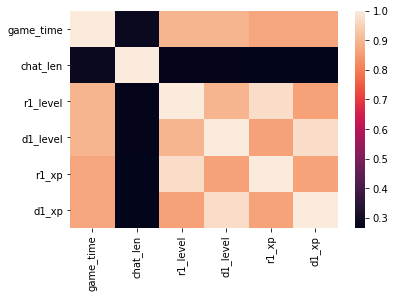

In [8]:
sns.heatmap(train_features[["game_time", "chat_len","r1_level", "d1_level",\
                "r1_xp","d1_xp"]].corr())

In [9]:
#кореляція із цільовою змінною
train_features[["game_time", "chat_len","r1_level", "d1_level",\
                "r1_xp","d1_xp"]].corrwith(y)

#видно, що підвищення d1_level, d1_xp веде до програшу Radiant
#відповідно r1_level, r1_xp - до виграшу.

game_time   -0.028947
chat_len    -0.022281
r1_level     0.018074
d1_level    -0.073291
r1_xp        0.020514
d1_xp       -0.080385
dtype: float64

Побудувати гістограми розподілу ознак

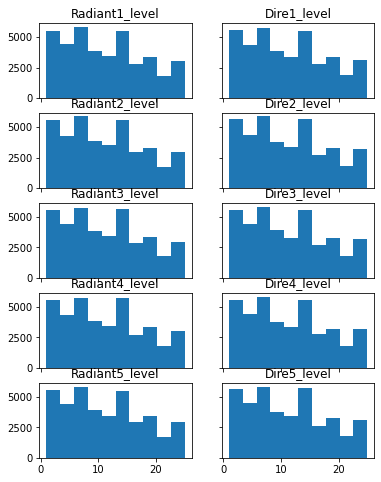

In [10]:
fig, ax = plt.subplots(5,2, figsize=(6,8), sharex = True, sharey = True)
#fig = plt.figure( figsize=(6*2, 8*5))
for i in [1,2,3,4,5]:
    ax[i-1][0].set_title(f"Radiant{i}_level")
    ax[i-1][0].hist(train_features[f"r{i}_level"])
    #ax[i-1][0].set_title(f"Radiant{i}_level")
    ax[i-1][1].set_title(f"Dire{i}_level")
    ax[i-1][1].hist(train_features[f"d{i}_level"])
    #ax[i-1][1].set_title(f"Dire{i}_level")

Побудувати boxplot відносно цільової змінної

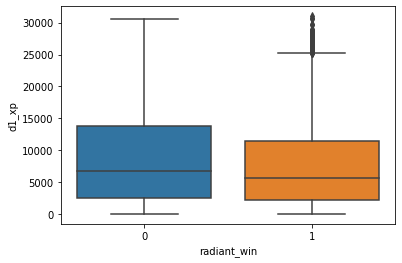

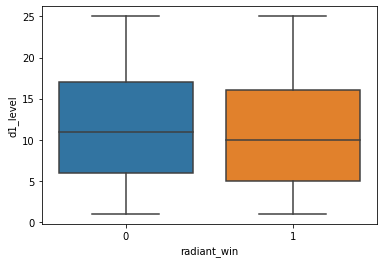

In [11]:
temp_df = train_features.copy()
temp_df["radiant_win"] = y
for i, word in enumerate(["xp","level"]):
    plt.figure(figsize=(6,4))
    sns.boxplot(x="radiant_win", y=f"d1_{word}", data=temp_df, dodge=False)

# 4. Попередня обробка та нормалізація даних

Обробка даних буде складатись із трьох частин: <br>
1) кодування категоріальних ознак (OneHotEncoder) <br>
2) кодування набору героїв в команді (мішок слів, CountVectorizer) <br>
3) нормалізація numeric-ознак

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() #для кодування категорій

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=unique_heroes) #для кодування мішка слів

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #для нормалізації numeric-ознак

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, y, test_size=0.2, stratify = y)

In [14]:
%%time
#game_mode, lobby_type - категорійні ознаки. Закодуємо їх за допомогою OneHotEncoder
def get_cat(df, train=True):
    
    if(train):
        ohe.fit(df[["game_mode","lobby_type"]])
    cat_cols = ["gamemode"+ i for i in ohe.categories_[0].astype('str')] + ["lobbytype"+i for i in ohe.categories_[1].astype('str')]
    cat_df = pd.DataFrame(data = ohe.transform(df[["game_mode","lobby_type"]]).toarray(), columns = cat_cols)
    """
    if(train):
        ohe.fit(df[["game_mode"]])
    cat_cols = ["gamemode"+ i for i in ohe.categories_[0].astype('str')]
    cat_df = pd.DataFrame(data = ohe.transform(df[["game_mode"]]).toarray(), columns = cat_cols)
    """
    return cat_df

cat_df_train = get_cat(X_train, train=True)
cat_df_val = get_cat(X_val, train=False)

CPU times: user 23.3 ms, sys: 442 µs, total: 23.8 ms
Wall time: 21.4 ms


In [15]:
%%time
#побудуємо мішок слів відносно набору героїв в командах.
def get_bag(df, train=True):
    radiant_row = df[f"r1_hero_id"].astype('str')
    dire_row = df[f"d1_hero_id"].astype('str')
    for i in range(2,6):
        radiant_row += " "
        radiant_row += df[f"r{i}_hero_id"].astype('str')
        dire_row += " "
        dire_row += df[f"d{i}_hero_id"].astype('str')

    radiant_bag = vectorizer.transform(radiant_row).toarray()
    dire_bag = vectorizer.transform(dire_row).toarray()

    bag_of_heroes = pd.DataFrame(data = (radiant_bag - dire_bag), columns = unique_heroes)
    return bag_of_heroes

bag_of_heroes_train = get_bag(X_train)
bag_of_heroes_val = get_bag(X_val)
bag_of_heroes_train

CPU times: user 1.04 s, sys: 44.3 ms, total: 1.08 s
Wall time: 1.08 s


,1,2,3,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,119,120
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,...,0,-1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
31737,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
31738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Проведемо нормалізацію чисельних ознак, що лишилися.

In [16]:
def get_numeric_df(df, train=True):
    df = df.drop(columns=["game_mode","lobby_type"])
    df = df.drop(columns = [f"r{i}_hero_id" for i in range(1,6)]+[f"d{i}_hero_id" for i in range(1,6)])
    if(train):
        scaler.fit( df )
    numeric_df = pd.DataFrame(data=scaler.transform(df), columns=df.columns )
    return numeric_df

numeric_df_train = get_numeric_df(X_train, train=True)
numeric_df_val = get_numeric_df(X_val, train=False)

In [17]:
final_df_train = pd.concat([cat_df_train, numeric_df_train, bag_of_heroes_train], axis=1)
final_df_val = pd.concat([cat_df_val,numeric_df_val, bag_of_heroes_val], axis=1)

final_df_train

,gamemode2,gamemode3,gamemode4,gamemode5,gamemode12,gamemode16,gamemode22,gamemode23,lobbytype0,lobbytype7,...,107,108,109,110,111,112,113,114,119,120
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,-1,0,0,0,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
31736,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1
31737,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,-1,0,0,0,0,0,0,0
31738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# 5. Переходимо до навчання моделей.

In [18]:
%%time
#навчити kNN-классифікатор
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(final_df_train, y_train)

y_pred = knn.predict(final_df_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      3770
           1       0.62      0.65      0.63      4165

    accuracy                           0.61      7935
   macro avg       0.61      0.61      0.61      7935
weighted avg       0.61      0.61      0.61      7935

[[2144 1626]
 [1475 2690]]
CPU times: user 27.9 s, sys: 4.53 s, total: 32.4 s
Wall time: 11.7 s


In [19]:
%%time
#навчити дерево рішень, візуалізувати його
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(ccp_alpha=0.001) #для кращої візуалізації
tree.fit(final_df_train, y_train)

y_pred = tree.predict(final_df_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50      3770
           1       0.61      0.85      0.71      4165

    accuracy                           0.63      7935
   macro avg       0.65      0.62      0.60      7935
weighted avg       0.65      0.63      0.61      7935

[[1470 2300]
 [ 627 3538]]
CPU times: user 5.9 s, sys: 18.9 ms, total: 5.91 s
Wall time: 5.92 s


[Text(647.6785714285713, 996.6, 'X[25] <= 0.44\ngini = 0.499\nsamples = 31740\nvalue = [15079, 16661]'),
 Text(358.71428571428567, 815.4000000000001, 'X[24] <= 0.369\ngini = 0.492\nsamples = 16891\nvalue = [9508, 7383]'),
 Text(199.28571428571428, 634.2, 'X[47] <= 0.458\ngini = 0.407\nsamples = 5753\nvalue = [4116, 1637]'),
 Text(119.57142857142856, 453.0, 'X[48] <= 0.44\ngini = 0.344\nsamples = 4410\nvalue = [3435, 975]'),
 Text(79.71428571428571, 271.79999999999995, 'X[116] <= 0.297\ngini = 0.279\nsamples = 3406\nvalue = [2835, 571]'),
 Text(39.857142857142854, 90.59999999999991, 'gini = 0.215\nsamples = 2440\nvalue = [2141, 299]'),
 Text(119.57142857142856, 90.59999999999991, 'gini = 0.405\nsamples = 966\nvalue = [694, 272]'),
 Text(159.42857142857142, 271.79999999999995, 'gini = 0.481\nsamples = 1004\nvalue = [600, 404]'),
 Text(279.0, 453.0, 'X[163] <= 0.319\ngini = 0.5\nsamples = 1343\nvalue = [681, 662]'),
 Text(239.1428571428571, 271.79999999999995, 'gini = 0.413\nsamples = 306

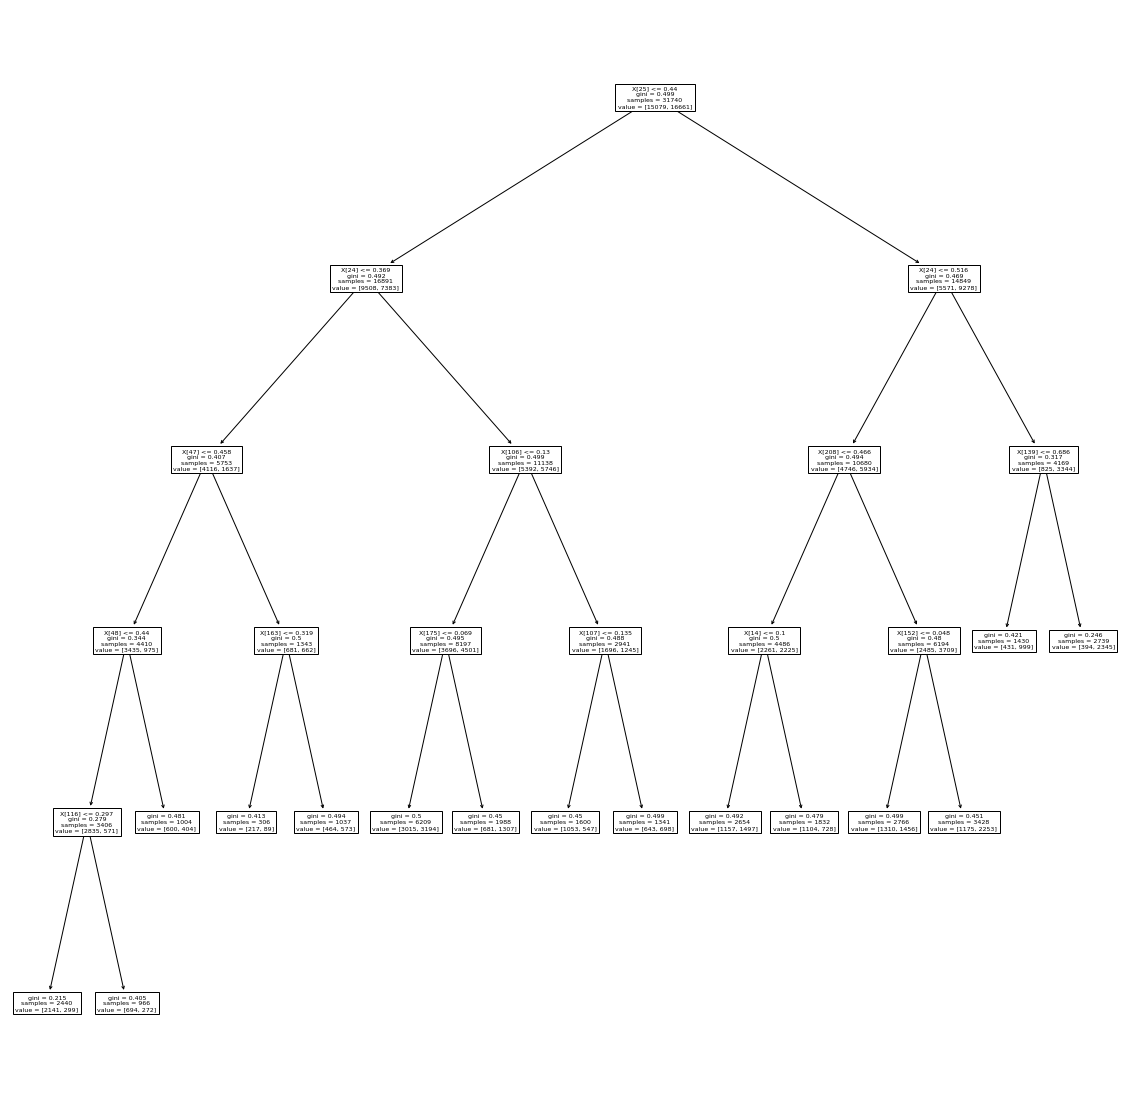

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(tree)

In [21]:
%%time
#навчити класифікатор SVM
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(final_df_train, y_train)

y_pred = svc.predict(final_df_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      3770
           1       0.74      0.77      0.75      4165

    accuracy                           0.74      7935
   macro avg       0.74      0.74      0.74      7935
weighted avg       0.74      0.74      0.74      7935

[[2659 1111]
 [ 966 3199]]
CPU times: user 25 s, sys: 125 ms, total: 25.2 s
Wall time: 25.1 s


/home/ivan/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [22]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(final_df_train, y_train)

y_pred = rf.predict(final_df_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67      3770
           1       0.70      0.75      0.72      4165

    accuracy                           0.70      7935
   macro avg       0.70      0.70      0.70      7935
weighted avg       0.70      0.70      0.70      7935

CPU times: user 32.6 s, sys: 182 ms, total: 32.8 s
Wall time: 8.65 s


In [23]:
imp_rf = pd.DataFrame()
imp_rf["feature"] = final_df_train.columns.tolist()
imp_rf["importance"] = rf.feature_importances_

imp_rf.sort_values(by=["importance"], ascending=False)[:20]

,feature,importance
71,r3_y,0.011871
94,r4_y,0.011365
47,r2_x,0.011119
139,d1_x,0.011053
140,d1_y,0.011047
25,r1_y,0.010997
186,d3_y,0.010785
48,r2_y,0.010721
231,d5_x,0.010556
185,d3_x,0.010425


Як показує permutation importance, найбільш важливими предикторами є фізичне розташування учасників гри

In [24]:
%%time
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))
ab.fit(final_df_train, y_train)

y_pred = ab.predict(final_df_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      3770
           1       0.71      0.73      0.72      4165

    accuracy                           0.70      7935
   macro avg       0.70      0.70      0.70      7935
weighted avg       0.70      0.70      0.70      7935

CPU times: user 55.1 s, sys: 709 ms, total: 55.8 s
Wall time: 56.1 s


In [25]:
imp_ab = pd.DataFrame()
imp_ab["feature"] = final_df_train.columns.tolist()
imp_ab["importance"] = ab.feature_importances_

imp_ab.sort_values(by=["importance"], ascending=False)[:20]

,feature,importance
24,r1_x,0.020525
178,d3_gold,0.019667
25,r1_y,0.018587
40,r2_gold,0.016757
224,d5_gold,0.016279
132,d1_gold,0.015882
155,d2_gold,0.015541
273,32,0.015469
129,d1_deaths,0.015398
86,r4_gold,0.014549


За версією AdaBoost, permutation importance виглядають інакше.

# Підібрати оптимальні параметри для класифікаторів kNN, SVM, RandomForest та AdaBoost

In [26]:
from sklearn.model_selection import GridSearchCV
n = int( 0.2*len(final_df_train) )

In [27]:
%%time

#підбір параметрів для kNN
grid_knn = {"n_neighbors":[5,7], 'p':[2,2.5]}
gs_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = grid_knn, n_jobs = -1, cv=2, verbose=3)
gs_knn.fit(final_df_train[:n], y_train[:n])

gs_knn.cv_results_

Fitting 2 folds for each of 4 candidates, totalling 8 fits
CPU times: user 164 ms, sys: 79.6 ms, total: 244 ms
Wall time: 2min 27s


{'mean_fit_time': array([0.03259742, 0.04128814, 0.02972257, 0.0293628 ]),
 'std_fit_time': array([0.00242579, 0.00461602, 0.00069177, 0.00039899]),
 'mean_score_time': array([  1.14629102, 143.5196135 ,   1.11014116, 142.75726449]),
 'std_score_time': array([0.08085918, 1.05260038, 0.02019632, 0.0951966 ]),
 'param_n_neighbors': masked_array(data=[5, 5, 7, 7],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[2, 2.5, 2, 2.5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5, 'p': 2},
  {'n_neighbors': 5, 'p': 2.5},
  {'n_neighbors': 7, 'p': 2},
  {'n_neighbors': 7, 'p': 2.5}],
 'split0_test_score': array([0.59766856, 0.58884688, 0.60743541, 0.60239445]),
 'split1_test_score': array([0.59010712, 0.58223062, 0.59861374, 0.5847511 ]),
 'mean_test_score': array([0.59388784, 0.58553875, 0.60302457, 0.59357278]),
 'std_test_score

In [33]:
# Вибирати алгоритм можна за 'mean_test_score' - за внутрішньою крос-валідацією  grid-search.
gs_knn.best_estimator_, gs_knn.best_params_

(KNeighborsClassifier(n_neighbors=7), {'n_neighbors': 7, 'p': 2})

In [28]:
%%time
#підбір параметрів для LinearSVC
grid_svm = {"C":[1e-1, 1e-2, 1e-3]}
gs_svm = GridSearchCV(estimator = LinearSVC(), param_grid = grid_svm, n_jobs=-1,verbose=3, cv=2)
gs_svm.fit(final_df_train[:n], y_train[:n])

gs_svm.cv_results_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
CPU times: user 664 ms, sys: 24.2 ms, total: 688 ms
Wall time: 1.27 s


{'mean_fit_time': array([0.48090279, 0.15622306, 0.10623884]),
 'std_fit_time': array([0.00901616, 0.0071094 , 0.00673485]),
 'mean_score_time': array([0.0112077 , 0.02348816, 0.0168047 ]),
 'std_score_time': array([0.00209177, 0.00505292, 0.00077248]),
 'param_C': masked_array(data=[0.1, 0.01, 0.001],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 0.01}, {'C': 0.001}],
 'split0_test_score': array([0.71928166, 0.70730939, 0.69218652]),
 'split1_test_score': array([0.70856963, 0.71455577, 0.68809074]),
 'mean_test_score': array([0.71392565, 0.71093258, 0.69013863]),
 'std_test_score': array([0.00535602, 0.00362319, 0.00204789]),
 'rank_test_score': array([1, 2, 3], dtype=int32)}

In [37]:
gs_svm.best_estimator_, gs_svm.best_params_

(LinearSVC(C=0.1), {'C': 0.1})

In [29]:
%%time
grid_rf = {"n_estimators":[100,300], "ccp_alpha":[0,0.01]}
gs_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf, n_jobs = -1, verbose=3, cv=2)
gs_rf.fit(final_df_train[:n], y_train[:n])

gs_rf.cv_results_

Fitting 2 folds for each of 4 candidates, totalling 8 fits
CPU times: user 10.3 s, sys: 29.3 ms, total: 10.4 s
Wall time: 22.8 s


{'mean_fit_time': array([2.66574275, 7.86438966, 2.83050787, 6.39458001]),
 'std_fit_time': array([0.02371657, 0.04564261, 0.04904568, 0.03761542]),
 'mean_score_time': array([0.19035113, 0.52110386, 0.07005441, 0.09821665]),
 'std_score_time': array([0.01137769, 0.02241445, 0.00605762, 0.00435722]),
 'param_ccp_alpha': masked_array(data=[0, 0, 0.01, 0.01],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 300, 100, 300],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ccp_alpha': 0, 'n_estimators': 100},
  {'ccp_alpha': 0, 'n_estimators': 300},
  {'ccp_alpha': 0.01, 'n_estimators': 100},
  {'ccp_alpha': 0.01, 'n_estimators': 300}],
 'split0_test_score': array([0.68399496, 0.68714556, 0.63327032, 0.63358538]),
 'split1_test_score': array([0.69439193, 0.69533711, 0.65248897, 0.66068053]),
 'mean_test_score': array([0.6891934

In [39]:
gs_rf.best_estimator_, gs_rf.best_params_

(RandomForestClassifier(ccp_alpha=0, n_estimators=300),
 {'ccp_alpha': 0, 'n_estimators': 300})

In [30]:
%%time
grid_ab = {"base_estimator":[DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],\
           "n_estimators":[100,300]}
gs_ab = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = grid_ab, n_jobs = -1, verbose=3, cv=2)
gs_ab.fit(final_df_train[:n], y_train[:n])

gs_ab.cv_results_

Fitting 2 folds for each of 4 candidates, totalling 8 fits
CPU times: user 41.4 s, sys: 28.9 ms, total: 41.4 s
Wall time: 1min 45s


{'mean_fit_time': array([10.23306406, 31.75322843, 15.06826818, 35.87944794]),
 'std_fit_time': array([0.08216989, 0.75685644, 0.35532963, 0.23950195]),
 'mean_score_time': array([0.47840202, 1.56191742, 0.44453061, 1.41641617]),
 'std_score_time': array([0.02295196, 0.19798386, 0.01238859, 0.00989676]),
 'param_base_estimator': masked_array(data=[DecisionTreeClassifier(max_depth=2),
                    DecisionTreeClassifier(max_depth=2),
                    DecisionTreeClassifier(max_depth=3),
                    DecisionTreeClassifier(max_depth=3)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 300, 100, 300],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'base_estimator': DecisionTreeClassifier(max_depth=2),
   'n_estimators': 100},
  {'base_estimator': DecisionTreeClassifier(max_depth=2), 'n_estimators': 300},
  {

In [40]:
gs_ab.best_params_, gs_ab.best_estimator_

({'base_estimator': DecisionTreeClassifier(max_depth=2), 'n_estimators': 300},
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                    n_estimators=300))

In [31]:
#FOR KAGGLE. Learning on full dataset

#from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression(solver = 'newton-cg')
#log_reg.fit(pd.concat([final_df_train,final_df_val],axis=0), pd.concat([y_train, y_val],axis=0)  )

#cat_df_test = get_cat(test_features, train=False)
##numeric_df_test = get_numeric_df(test_features, train=False)
#bag_of_heroes_test = get_bag(test_features)

#final_df_test = pd.concat([cat_df_test, numeric_df_test, bag_of_heroes_test], axis = 1)

#sub = pd.read_csv("sample_submission.csv")
#sub['radiant_win_prob'] = log_reg.predict_proba(final_df_test)[:,1]
#sub.to_csv("logreg2.csv", index=False)